# Benchmark metodi iterativi

- Volpato Mattia 866316
- Andreotti Stefano 851596

## Importazione librerie

In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

from matspy import spy

import time

from solver.Solver import Solver
import solver.Util as Util
from exception.MaxIterationException import MaxIterationException

from tqdm import tqdm

## Definizione di constanti

In [2]:
SPA_1_PATH = '../matrici/spa1.mtx'
SPA_2_PATH = '../matrici/spa2.mtx'
VEM_1_PATH = '../matrici/vem1.mtx'
VEM_2_PATH = '../matrici/vem2.mtx'

DEFAULT_FIGSIZE = 5

DEFAULT_DPI = 300

## Caricamento matrici

### SPA

Matrici sparse

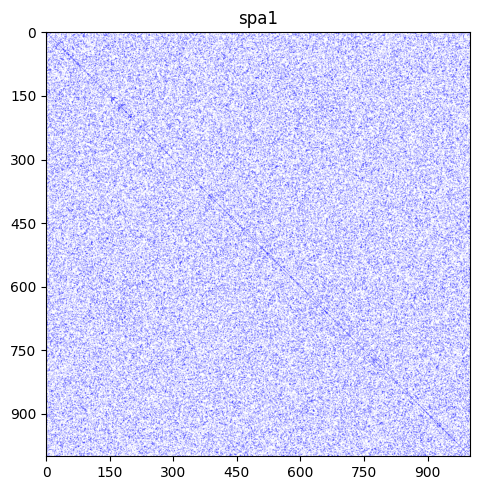

Non-zero entries: 182264, 18.23%


In [3]:
spa1 = sp.io.mmread(SPA_1_PATH).tocsr()
spy(spa1, title='spa1', figsize=DEFAULT_FIGSIZE, dpi=DEFAULT_DPI)
print(f"Non-zero entries: {spa1.count_nonzero()}, {spa1.count_nonzero() / (spa1.shape[0] * spa1.shape[1]) * 100:.2f}%")

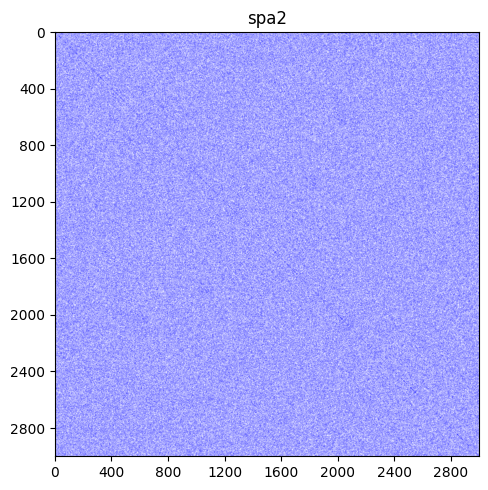

Non-zero entries: 1631738, 18.13 %


In [4]:
spa2 = sp.io.mmread(SPA_2_PATH).tocsr()
spy(spa2, title='spa2', figsize=DEFAULT_FIGSIZE, dpi=DEFAULT_DPI)
print(f"Non-zero entries: {spa2.count_nonzero()}, {spa2.count_nonzero() / (spa2.shape[0] * spa2.shape[1]) * 100:.2f} %")

### VEM

Matrici a bande

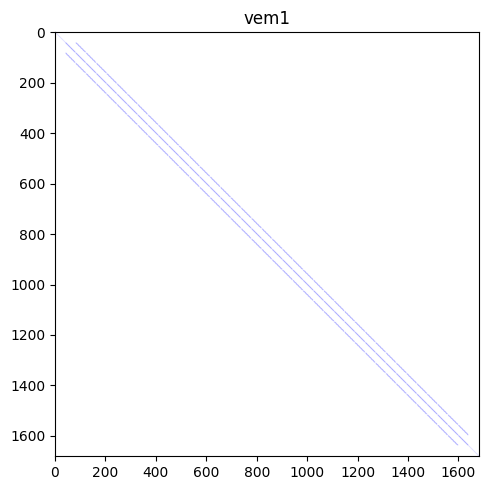

Non-zero entries: 13385, 0.47 %


In [5]:
vem1 = sp.io.mmread(VEM_1_PATH).tocsr()
spy(vem1, title='vem1', figsize=DEFAULT_FIGSIZE, dpi=DEFAULT_DPI)
print(f"Non-zero entries: {vem1.count_nonzero()}, {vem1.count_nonzero() / (vem1.shape[0] * vem1.shape[1]) * 100:.2f} %")

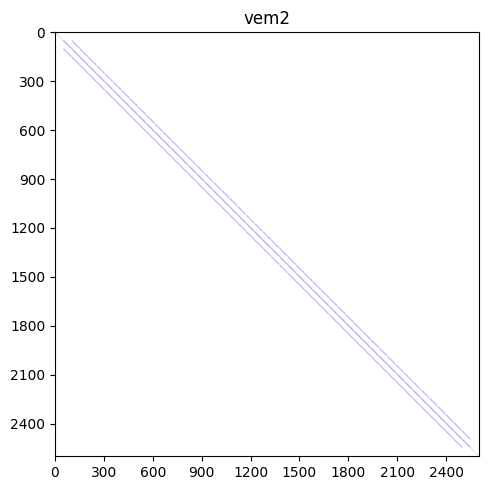

Non-zero entries: 21225, 0.31 %


In [6]:
vem2 = sp.io.mmread(VEM_2_PATH).tocsr()
spy(vem2, title='vem2', figsize=DEFAULT_FIGSIZE, dpi=DEFAULT_DPI)
print(f"Non-zero entries: {vem2.count_nonzero()}, {vem2.count_nonzero() / (vem2.shape[0] * vem2.shape[1]) * 100:.2f} %")

## Creazione del termine noto *b*

In [7]:
def create_b(A:sp.sparse.csr_matrix, x:np.ndarray=None) -> np.ndarray:
    if x is None:
        x = np.ones(A.shape[1], dtype=np.float64)
        
    return A.dot(x)

### SPA1

In [8]:
b_spa1 = create_b(spa1)

assert len(b_spa1) == spa1.shape[0] == spa1.shape[0], "Shapes mismatch"

b_spa1.shape

(1000,)

### SPA2

In [9]:
b_spa2 = create_b(spa2)

assert len(b_spa2) == spa2.shape[0] == spa2.shape[0], "Shapes mismatch"

b_spa2.shape

(3000,)

### VEM1

In [10]:
b_vem1 = create_b(vem1)

assert len(b_vem1) == vem1.shape[0] == vem1.shape[0], "Shapes mismatch"

b_vem1.shape

(1681,)

### VEM2

In [11]:
b_vem2 = create_b(vem2)

assert len(b_vem2) == vem2.shape[0] == vem2.shape[0], "Shapes mismatch"

b_vem2.shape

(2601,)

## Funzione di testing

In [12]:
matrixes = [spa1, spa2, vem1, vem2]
b = [b_spa1, b_spa2, b_vem1, b_vem2]
matrixes_names = ['spa1', 'spa2', 'vem1', 'vem2']

In [13]:
def test(solver:Solver, n_test:int=1, verbose:bool=False):
    matrixes_times = {}

    for i, matrix in enumerate(matrixes):
        if verbose:
            print(f"Testing matrix {matrixes_names[i]} ({i + 1}/{len(matrixes)})")

        matrixes_times[matrixes_names[i]] = {}
        matrix_times = []
        failed, reason = False, None

        for j in range(n_test):
            if verbose:
                print(f"\tTest {j + 1}/{n_test}: ", end="")

            start = time.time()
            try:
                _ = solver.solve(matrix, b[i])
            except MaxIterationException as e:
                failed = True
                reason = "MAX_ITER_FAIL"
                if verbose:
                    print("Failed for max iterations=", e.iter)
                break
            end = time.time()
            iterations = solver.iter

            matrix_times.append(end - start)
            
            if verbose:
                print(f"Passed with {iterations} iterations in {matrix_times[-1]} s")

        if not failed:
            matrixes_times[matrixes_names[i]]['time'] = np.mean(matrix_times)
            matrixes_times[matrixes_names[i]]['iter'] = iterations
        else:
            matrixes_times[matrixes_names[i]] = reason

    return matrixes_times

## Parametri

In [14]:
MAX_ITER = 20000
EPSILON = 1e-9
N_TEST = 3
CHECK_CORRECTNESS = True
VERBOSE = True

## Metodo di Jacobi

Risolve un sistema lineare Ax = b usando il **metodo di Jacobi**.

In [15]:
from solver.JacobiSolver import JacobiSolver

jacobi = JacobiSolver(tol=EPSILON, max_iter=MAX_ITER, initialization_mode=Util.InitializationMode.ZEROS) 
solution = jacobi.solve(matrixes[0], b[0])

print(f'Iterations: {jacobi.iter}')
solution

Iterations: 281


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.00000001, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.00000002, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.00000003, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.00000001,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [16]:
test(jacobi, n_test=N_TEST, verbose=VERBOSE)

Testing matrix spa1 (1/4)
	Test 1/3: Passed with 281 iterations in 0.09695911407470703 s
	Test 2/3: Passed with 281 iterations in 0.09379959106445312 s
	Test 3/3: Passed with 281 iterations in 0.07166719436645508 s
Testing matrix spa2 (2/4)
	Test 1/3: Passed with 89 iterations in 0.2617831230163574 s
	Test 2/3: Passed with 89 iterations in 0.20645833015441895 s
	Test 3/3: Passed with 89 iterations in 0.1899259090423584 s
Testing matrix vem1 (3/4)
	Test 1/3: Passed with 4113 iterations in 0.15430736541748047 s
	Test 2/3: Passed with 4113 iterations in 0.1955122947692871 s
	Test 3/3: Passed with 4113 iterations in 0.15125823020935059 s
Testing matrix vem2 (4/4)
	Test 1/3: Passed with 6300 iterations in 0.35401201248168945 s
	Test 2/3: Passed with 6300 iterations in 0.34182119369506836 s
	Test 3/3: Passed with 6300 iterations in 0.3247504234313965 s


{'spa1': {'time': 0.08747529983520508, 'iter': 281},
 'spa2': {'time': 0.21938912073771158, 'iter': 89},
 'vem1': {'time': 0.1670259634653727, 'iter': 4113},
 'vem2': {'time': 0.3401945432027181, 'iter': 6300}}

In [17]:
epsilons = [1e-4, 1e-6, 1e-8, 1e-10]
n_tests = [3, 3, 3, 3]
verboses = [False, False, False, False]

jacobi_epsilon_df = pd.DataFrame(zip(epsilons, n_tests), columns=['epsilon', 'n_test'])
for name in matrixes_names:
    jacobi_epsilon_df[name + '_time'] = None
    jacobi_epsilon_df[name + '_iter'] = None

for i in tqdm(range(len(epsilons)), desc='Testing Jacobi with different tolerances'):
    jacobi.tol = epsilons[i]
    result_dict = test(jacobi, n_test=n_tests[i], verbose=verboses[i])

    for j, name in enumerate(result_dict):
        jacobi_epsilon_df.loc[i, name + '_time'] = result_dict[name]['time']
        jacobi_epsilon_df.loc[i, name + '_iter'] = result_dict[name]['iter']

jacobi_epsilon_df

Testing Jacobi with different tolerances: 100%|██████████| 4/4 [00:06<00:00,  1.67s/it]


,epsilon,n_test,spa1_time,spa1_iter,spa2_time,spa2_iter,vem1_time,vem1_iter,vem2_time,vem2_iter
0,1.000000e-04,3,0.04022,116,0.095518,37,0.046126,1315,0.097447,1928
1,1.000000e-06,3,0.046949,182,0.135587,58,0.095134,2434,0.183087,3677
2,1.000000e-08,3,0.061566,248,0.172829,79,0.172698,3553,0.25356,5426
3,1.000000e-10,3,0.072101,314,0.22166,100,0.190441,4672,0.335675,7175


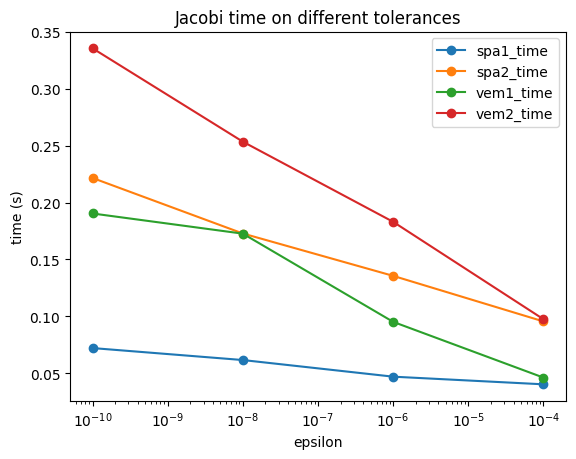

In [18]:
jacobi_epsilon_df[['epsilon', 'spa1_time', 
                    'spa2_time', 'vem1_time', 'vem2_time']].plot(x='epsilon', kind='line', ylabel='time (s)', 
                                                                logx=True, marker='o', 
                                                                title='Jacobi time on different tolerances')

plt.show()

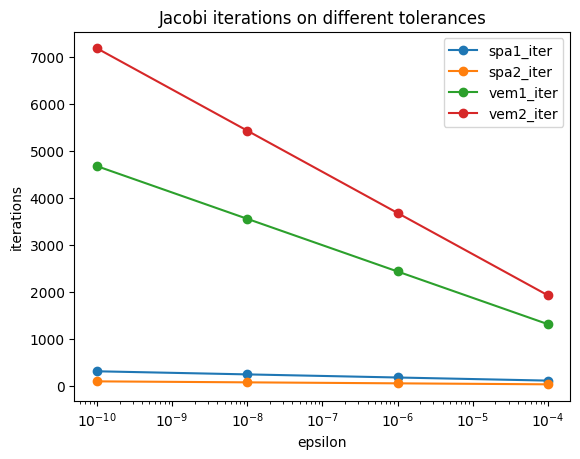

In [19]:
jacobi_epsilon_df[['epsilon', 'spa1_iter', 
                    'spa2_iter', 'vem1_iter', 'vem2_iter']].plot(x='epsilon', kind='line', ylabel='iterations', 
                                                                logx=True, marker='o', 
                                                                title='Jacobi iterations on different tolerances')
plt.show()

In [20]:
jacobi_sparsity_df = pd.DataFrame([(matrixes_names[i], matrixes[i].shape[0], matrixes[i].count_nonzero(), matrixes[i].count_nonzero() / (matrixes[i].shape[0] * matrixes[i].shape[1])) for i in range(len(matrixes))],
                                    columns=['name', 'N', 'nonzero_entries', 'sparsity_index'])

row = 2
jacobi_sparsity_df['times'] = jacobi_epsilon_df.loc[row, [name + '_time' for name in matrixes_names]].values
jacobi_sparsity_df['iter'] = jacobi_epsilon_df.loc[row, [name + '_iter' for name in matrixes_names]].values

jacobi_sparsity_df            

,name,N,nonzero_entries,sparsity_index,times,iter
0,spa1,1000,182264,0.182264,0.061566,248
1,spa2,3000,1631738,0.181304,0.172829,79
2,vem1,1681,13385,0.004737,0.172698,3553
3,vem2,2601,21225,0.003137,0.25356,5426


## Metodo di Gauss-Seidel
    
Risolve un sistema lineare Ax = b usando il **metodo di Gauss-Seidel**.

In [21]:
from solver.GaussSeidelSolver import GaussSeidelSolver

gauss_seidel = GaussSeidelSolver(tol=EPSILON, max_iter=MAX_ITER, initialization_mode=Util.InitializationMode.ZEROS,
                           forward_substitution_mode=Util.ForwardSubstitutionMode.SCIPY)
 
solution = gauss_seidel.solve(matrixes[0], b[0])

print(f'Iterations: {gauss_seidel.iter}')
solution

Iterations: 29


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999996, 1.        ,
       1.        , 1.        , 1.        , 1.00000001, 1.        ,
       1.        , 1.00000004, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999999, 1.        , 0.99999984, 1.        , 1.        ,
       1.        , 0.99999999, 1.        , 1.        , 0.99999997,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999999, 1.     

In [22]:
test(gauss_seidel, n_test=1, verbose=VERBOSE)

Testing matrix spa1 (1/4)
	Test 1/1: Passed with 29 iterations in 0.12238788604736328 s
Testing matrix spa2 (2/4)
	Test 1/1: Passed with 15 iterations in 0.6517598628997803 s
Testing matrix vem1 (3/4)
	Test 1/1: Passed with 2059 iterations in 27.863571405410767 s
Testing matrix vem2 (4/4)
	Test 1/1: Passed with 3153 iterations in 96.01939678192139 s


{'spa1': {'time': 0.12238788604736328, 'iter': 29},
 'spa2': {'time': 0.6517598628997803, 'iter': 15},
 'vem1': {'time': 27.863571405410767, 'iter': 2059},
 'vem2': {'time': 96.01939678192139, 'iter': 3153}}

In [23]:
epsilons = [1e-4, 1e-6, 1e-8, 1e-10]
n_tests = [1, 1, 1, 1]
verboses = [False, False, False, False]

gauss_seidel_epsilon_df = pd.DataFrame(zip(epsilons, n_tests), columns=['epsilon', 'n_test'])
for name in matrixes_names:
    gauss_seidel_epsilon_df[name + '_time'] = None
    gauss_seidel_epsilon_df[name + '_iter'] = None

for i in tqdm(range(len(epsilons)), desc='Testing Gauss-Seidel with different tolerances'):
    gauss_seidel.tol = epsilons[i]
    result_dict = test(gauss_seidel, n_test=n_tests[i], verbose=verboses[i])

    for j, name in enumerate(result_dict):
        gauss_seidel_epsilon_df.loc[i, name + '_time'] = result_dict[name]['time']
        gauss_seidel_epsilon_df.loc[i, name + '_iter'] = result_dict[name]['iter']

gauss_seidel_epsilon_df

Testing Gauss-Seidel with different tolerances: 100%|██████████| 4/4 [06:03<00:00, 91.00s/it] 


,epsilon,n_test,spa1_time,spa1_iter,spa2_time,spa2_iter,vem1_time,vem1_iter,vem2_time,vem2_iter
0,1.000000e-04,1,0.055515,10,0.297287,6,8.948587,660,29.776482,966
1,1.000000e-06,1,0.10247,18,0.42053,9,17.154853,1219,58.338193,1841
2,1.000000e-08,1,0.09167,25,0.538953,13,23.076995,1779,82.959381,2715
3,1.000000e-10,1,0.150737,32,0.764551,16,30.201626,2339,111.108107,3590


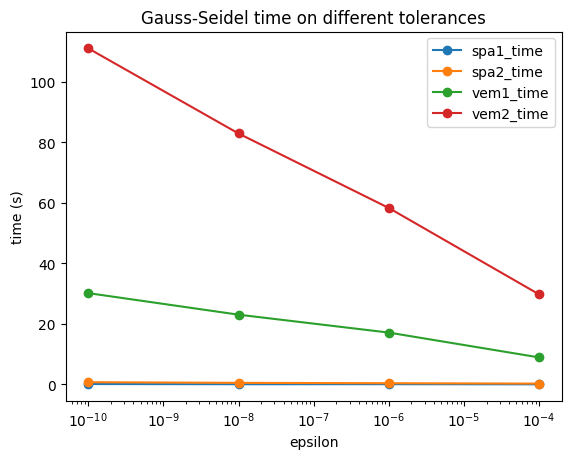

In [24]:
gauss_seidel_epsilon_df[['epsilon', 'spa1_time', 
                    'spa2_time', 'vem1_time', 'vem2_time']].plot(x='epsilon', kind='line', ylabel='time (s)', 
                                                                logx=True, marker='o', 
                                                                title='Gauss-Seidel time on different tolerances')

plt.show() 

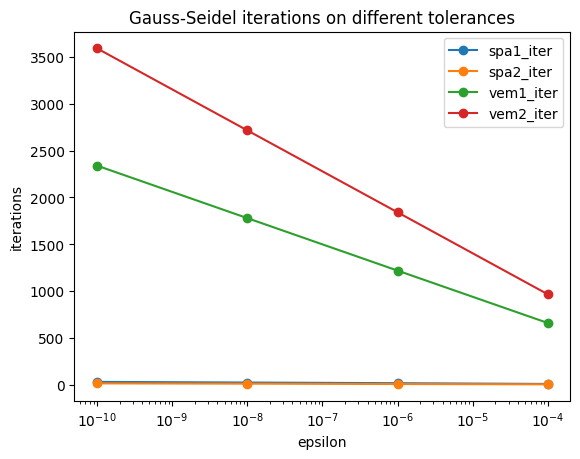

In [25]:
gauss_seidel_epsilon_df[['epsilon', 'spa1_iter', 
                        'spa2_iter', 'vem1_iter', 'vem2_iter']].plot(x='epsilon', kind='line', ylabel='iterations', 
                                                                logx=True, marker='o', 
                                                                title='Gauss-Seidel iterations on different tolerances')
plt.show()

In [26]:
gauss_seidel_sparsity_df = pd.DataFrame([(matrixes_names[i], matrixes[i].shape[0], matrixes[i].count_nonzero(), matrixes[i].count_nonzero() / (matrixes[i].shape[0] * matrixes[i].shape[1])) for i in range(len(matrixes))],
                                    columns=['name', 'N', 'nonzero_entries', 'sparsity_index'])

row = 2
gauss_seidel_sparsity_df['times'] = gauss_seidel_epsilon_df.loc[row, [name + '_time' for name in matrixes_names]].values
gauss_seidel_sparsity_df['iter'] = gauss_seidel_epsilon_df.loc[row, [name + '_iter' for name in matrixes_names]].values

gauss_seidel_sparsity_df  

,name,N,nonzero_entries,sparsity_index,times,iter
0,spa1,1000,182264,0.182264,0.09167,25
1,spa2,3000,1631738,0.181304,0.538953,13
2,vem1,1681,13385,0.004737,23.076995,1779
3,vem2,2601,21225,0.003137,82.959381,2715


## Metodo di discesa del gradiente
    
Risolve un sistema lineare Ax = b usando il **metodo del Gradiente**.

In [27]:
from solver.GradientSolver import GradientSolver

gradient = GradientSolver(tol=EPSILON, max_iter=MAX_ITER, initialization_mode=Util.InitializationMode.ZEROS) 
solution = gradient.solve(matrixes[0], b[0])

print(f'Iterations: {gradient.iter}')
solution

Iterations: 10576


array([1.        , 1.00000001, 1.        , 1.00000004, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999999, 1.00000002, 1.        , 1.00000002, 1.        ,
       1.        , 1.        , 0.99999999, 1.        , 0.99999999,
       1.        , 0.99999999, 1.00000005, 1.00000022, 1.        ,
       1.        , 1.00000001, 1.        , 0.99999996, 1.00000001,
       0.99999999, 0.99999977, 1.        , 1.00000003, 1.        ,
       1.        , 1.        , 1.        , 1.00000003, 1.        ,
       1.        , 1.00000003, 1.00000004, 1.00000002, 0.99999999,
       1.        , 1.        , 0.99999999, 0.99999996, 1.        ,
       1.        , 1.00000001, 1.        , 1.00000001, 1.00000002,
       1.00000004, 1.        , 1.00000117, 1.        , 1.00000002,
       1.00000001, 1.00000004, 1.        , 1.        , 1.00000017,
       1.        , 1.        , 0.99999999, 1.        , 0.99999997,
       1.        , 1.00000001, 1.        , 1.00000005, 1.     

In [28]:
test(gradient, n_test=N_TEST, verbose=VERBOSE)

Testing matrix spa1 (1/4)
	Test 1/3: Passed with 10576 iterations in 4.962409973144531 s
	Test 2/3: Passed with 10576 iterations in 4.996873140335083 s
	Test 3/3: Passed with 10576 iterations in 5.034651279449463 s
Testing matrix spa2 (2/4)
	Test 1/3: Passed with 6682 iterations in 30.99571132659912 s
	Test 2/3: Passed with 6682 iterations in 29.916632175445557 s
	Test 3/3: Passed with 6682 iterations in 28.82575035095215 s
Testing matrix vem1 (3/4)
	Test 1/3: Passed with 2697 iterations in 0.15759921073913574 s
	Test 2/3: Passed with 2697 iterations in 0.1260986328125 s
	Test 3/3: Passed with 2697 iterations in 0.15445184707641602 s
Testing matrix vem2 (4/4)
	Test 1/3: Passed with 4131 iterations in 0.26169776916503906 s
	Test 2/3: Passed with 4131 iterations in 0.27566051483154297 s
	Test 3/3: Passed with 4131 iterations in 0.28111982345581055 s


{'spa1': {'time': 4.997978130976359, 'iter': 10576},
 'spa2': {'time': 29.912697950998943, 'iter': 6682},
 'vem1': {'time': 0.14604989687601724, 'iter': 2697},
 'vem2': {'time': 0.2728260358174642, 'iter': 4131}}

In [51]:
epsilons = [1e-4, 1e-6, 1e-8, 1e-10]
n_tests = [1, 1, 1, 1]
verboses = [False, False, False, False]

gradient_epsilon_df = pd.DataFrame(zip(epsilons, n_tests), columns=['epsilon', 'n_test'])
for name in matrixes_names:
    gradient_epsilon_df[name + '_time'] = None
    gradient_epsilon_df[name + '_iter'] = None

for i in tqdm(range(len(epsilons)), desc='Testing Gradient with different tolerances'):
    gradient.tol = epsilons[i]
    result_dict = test(gradient, n_test=n_tests[i], verbose=verboses[i])

    for j, name in enumerate(result_dict):
        gradient_epsilon_df.loc[i, name + '_time'] = result_dict[name]['time']
        gradient_epsilon_df.loc[i, name + '_iter'] = result_dict[name]['iter']

gradient_epsilon_df

Testing Gradient with different tolerances: 100%|██████████| 4/4 [01:21<00:00, 20.33s/it]


,epsilon,n_test,spa1_time,spa1_iter,spa2_time,spa2_iter,vem1_time,vem1_iter,vem2_time,vem2_iter
0,1.000000e-04,1,0.116922,144,0.746107,162,0.056809,891,0.082941,1309
1,1.000000e-06,1,1.645106,3578,8.838301,1950,0.094964,1613,0.158677,2439
2,1.000000e-08,1,4.007221,8234,22.060645,5088,0.109381,2337,0.22854,3567
3,1.000000e-10,1,5.479267,12920,37.205826,8286,0.165855,3059,0.309319,4697


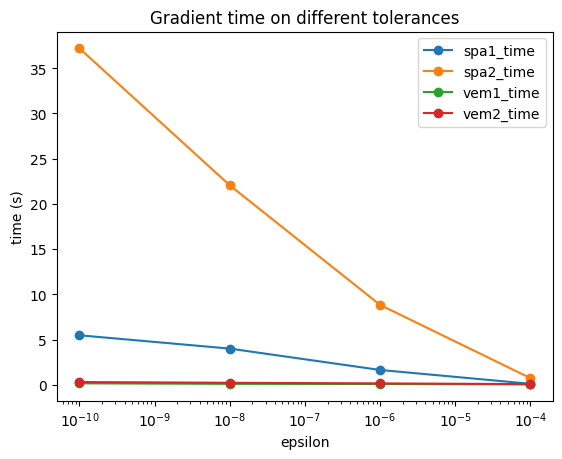

In [52]:
gradient_epsilon_df[['epsilon', 'spa1_time', 
                    'spa2_time', 'vem1_time', 'vem2_time']].plot(x='epsilon', kind='line', ylabel='time (s)', 
                                                                logx=True, marker='o', 
                                                                title='Gradient time on different tolerances')

plt.show() 

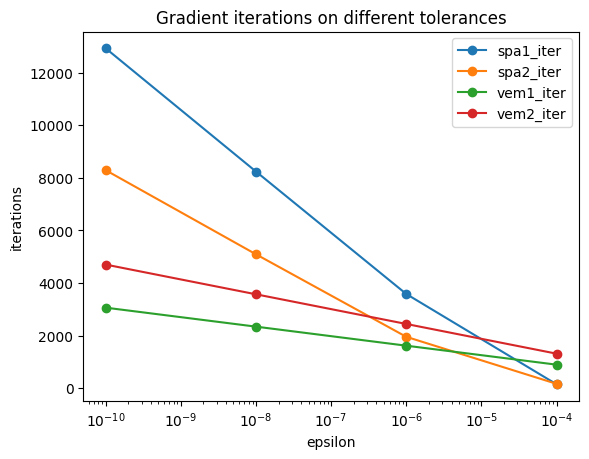

In [53]:
gradient_epsilon_df[['epsilon', 'spa1_iter', 
                        'spa2_iter', 'vem1_iter', 'vem2_iter']].plot(x='epsilon', kind='line', ylabel='iterations', 
                                                                logx=True, marker='o', 
                                                                title='Gradient iterations on different tolerances')
plt.show()

In [54]:
gradient_sparsity_df = pd.DataFrame([(matrixes_names[i], matrixes[i].shape[0], matrixes[i].count_nonzero(), matrixes[i].count_nonzero() / (matrixes[i].shape[0] * matrixes[i].shape[1])) for i in range(len(matrixes))],
                                    columns=['name', 'N', 'nonzero_entries', 'sparsity_index'])

row = 2
gradient_sparsity_df['times'] = gradient_epsilon_df.loc[row, [name + '_time' for name in matrixes_names]].values
gradient_sparsity_df['iter'] = gradient_epsilon_df.loc[row, [name + '_iter' for name in matrixes_names]].values

gradient_sparsity_df  

,name,N,nonzero_entries,sparsity_index,times,iter
0,spa1,1000,182264,0.182264,4.007221,8234
1,spa2,3000,1631738,0.181304,22.060645,5088
2,vem1,1681,13385,0.004737,0.109381,2337
3,vem2,2601,21225,0.003137,0.22854,3567


## Metodo di discesa del gradiente coniugato

Risolve un sistema lineare simmetrico e definito positivo Ax = b usando **il metodo del Gradiente Coniugato**.

In [33]:
from solver.ConjugateGradientSolver import ConjugateGradientSolver

conjugate_gradient = ConjugateGradientSolver(tol=EPSILON, max_iter=MAX_ITER, initialization_mode=Util.InitializationMode.ZEROS) 
solution = gradient.solve(matrixes[0], b[0])

print(f'Iterations: {conjugate_gradient.iter}')
solution

Iterations: 0


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.00000002, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999998, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.00000012, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.00000002,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [34]:
test(conjugate_gradient, n_test=N_TEST, verbose=VERBOSE)

Testing matrix spa1 (1/4)
	Test 1/3: Passed with 188 iterations in 0.17897295951843262 s
	Test 2/3: Passed with 188 iterations in 0.15908336639404297 s
	Test 3/3: Passed with 188 iterations in 0.14978551864624023 s
Testing matrix spa2 (2/4)
	Test 1/3: Passed with 220 iterations in 1.8728985786437988 s
	Test 2/3: Passed with 220 iterations in 1.9119527339935303 s
	Test 3/3: Passed with 220 iterations in 1.8930094242095947 s
Testing matrix vem1 (3/4)
	Test 1/3: Passed with 56 iterations in 0.0 s
	Test 2/3: Passed with 56 iterations in 0.0 s
	Test 3/3: Passed with 56 iterations in 0.015627622604370117 s
Testing matrix vem2 (4/4)
	Test 1/3: Passed with 70 iterations in 0.0 s
	Test 2/3: Passed with 70 iterations in 0.020438671112060547 s
	Test 3/3: Passed with 70 iterations in 0.0 s


{'spa1': {'time': 0.16261394818623862, 'iter': 188},
 'spa2': {'time': 1.8926202456156414, 'iter': 220},
 'vem1': {'time': 0.005209207534790039, 'iter': 56},
 'vem2': {'time': 0.006812890370686849, 'iter': 70}}

In [59]:
epsilons = [1e-4, 1e-6, 1e-8, 1e-10]
n_tests = [3, 3, 3, 3]
verboses = [False, False, False, False]

conjugate_gradient_epsilon_df = pd.DataFrame(zip(epsilons, n_tests), columns=['epsilon', 'n_test'])
for name in matrixes_names:
    conjugate_gradient_epsilon_df[name + '_time'] = None
    conjugate_gradient_epsilon_df[name + '_iter'] = None

for i in tqdm(range(len(epsilons)), desc='Testing Conjugate Gradient with different tolerances'):
    conjugate_gradient.tol = epsilons[i]
    result_dict = test(conjugate_gradient, n_test=n_tests[i], verbose=verboses[i])

    for j, name in enumerate(result_dict):
        conjugate_gradient_epsilon_df.loc[i, name + '_time'] = result_dict[name]['time']
        conjugate_gradient_epsilon_df.loc[i, name + '_iter'] = result_dict[name]['iter']

conjugate_gradient_epsilon_df

Testing Conjugate Gradient with different tolerances: 100%|██████████| 4/4 [00:17<00:00,  4.39s/it]


,epsilon,n_test,spa1_time,spa1_iter,spa2_time,spa2_iter,vem1_time,vem1_iter,vem2_time,vem2_iter
0,1.000000e-04,3,0.057776,49,0.426621,42,0.00368,38,0.005346,47
1,1.000000e-06,3,0.134801,134,1.135591,122,0.007391,45,0.007148,56
2,1.000000e-08,3,0.150343,177,1.675488,196,0.005208,53,0.010405,66
3,1.000000e-10,3,0.170886,200,2.041009,240,0.005197,59,0.010418,74


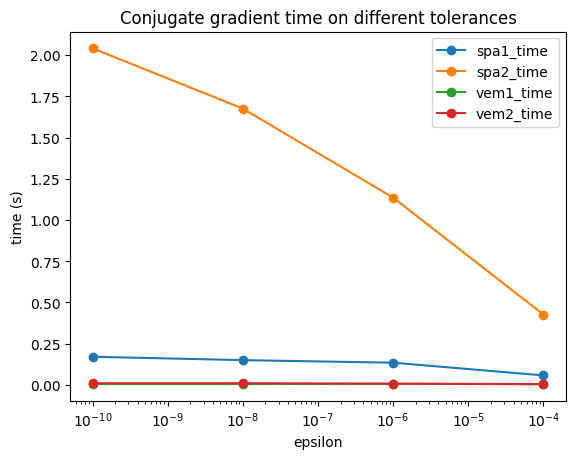

In [60]:
conjugate_gradient_epsilon_df[['epsilon', 'spa1_time', 
                    'spa2_time', 'vem1_time', 'vem2_time']].plot(x='epsilon', kind='line', ylabel='time (s)', 
                                                                logx=True, marker='o', 
                                                                title='Conjugate gradient time on different tolerances')

plt.show() 

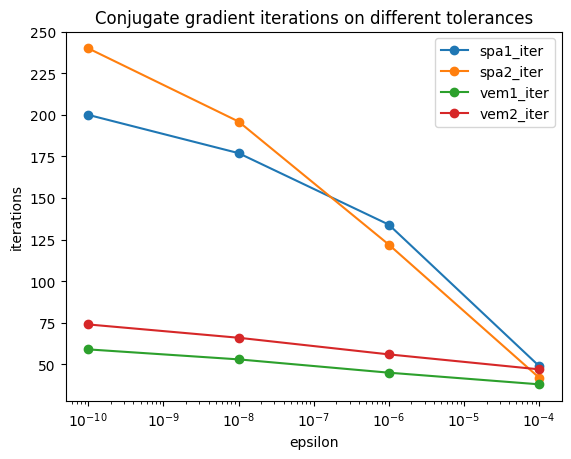

In [61]:
conjugate_gradient_epsilon_df[['epsilon', 'spa1_iter', 
                        'spa2_iter', 'vem1_iter', 'vem2_iter']].plot(x='epsilon', kind='line', ylabel='iterations', 
                                                                logx=True, marker='o', 
                                                                title='Conjugate gradient iterations on different tolerances')
plt.show()

In [58]:
conjugate_gradient_sparsity_df = pd.DataFrame([(matrixes_names[i], matrixes[i].shape[0], matrixes[i].count_nonzero(), matrixes[i].count_nonzero() / (matrixes[i].shape[0] * matrixes[i].shape[1])) for i in range(len(matrixes))],
                                    columns=['name', 'N', 'nonzero_entries', 'sparsity_index'])

row = 2
conjugate_gradient_sparsity_df['times'] = conjugate_gradient_epsilon_df.loc[row, [name + '_time' for name in matrixes_names]].values
conjugate_gradient_sparsity_df['iter'] = conjugate_gradient_epsilon_df.loc[row, [name + '_iter' for name in matrixes_names]].values

conjugate_gradient_sparsity_df  

,name,N,nonzero_entries,sparsity_index,times,iter
0,spa1,1000,182264,0.182264,0.171712,177
1,spa2,3000,1631738,0.181304,1.980556,196
2,vem1,1681,13385,0.004737,0.005208,53
3,vem2,2601,21225,0.003137,0.00521,66


## Comparazione dei metodi per le diverse matrici

### SPA1

In [63]:
df_spa1 = jacobi_epsilon_df[['epsilon', 'spa1_time', 'spa1_iter']]
df_spa1.columns = ['epsilon', 'jacobi_time', 'jacobi_iter']
df_spa1 = df_spa1.merge(gauss_seidel_epsilon_df[['epsilon', 'spa1_time', 'spa1_iter']], on='epsilon')
df_spa1.columns = list(df_spa1.columns)[:-2] + ['gauss_seidel_time', 'gauss_seidel_iter']
df_spa1 = df_spa1.merge(gradient_epsilon_df[['epsilon', 'spa1_time', 'spa1_iter']], on='epsilon')
df_spa1.columns = list(df_spa1.columns)[:-2] + ['gradient_time', 'gradient_iter']
df_spa1 = df_spa1.merge(conjugate_gradient_epsilon_df[['epsilon', 'spa1_time', 'spa1_iter']], on='epsilon')
df_spa1.columns = list(df_spa1.columns)[:-2] + ['conjugate_gradient_time', 'conjugate_gradient_iter']

df_spa1

,epsilon,jacobi_time,jacobi_iter,gauss_seidel_time,gauss_seidel_iter,gradient_time,gradient_iter,conjugate_gradient_time,conjugate_gradient_iter
0,1.000000e-04,0.04022,116,0.055515,10,0.116922,144,0.057776,49
1,1.000000e-06,0.046949,182,0.10247,18,1.645106,3578,0.134801,134
2,1.000000e-08,0.061566,248,0.09167,25,4.007221,8234,0.150343,177
3,1.000000e-10,0.072101,314,0.150737,32,5.479267,12920,0.170886,200


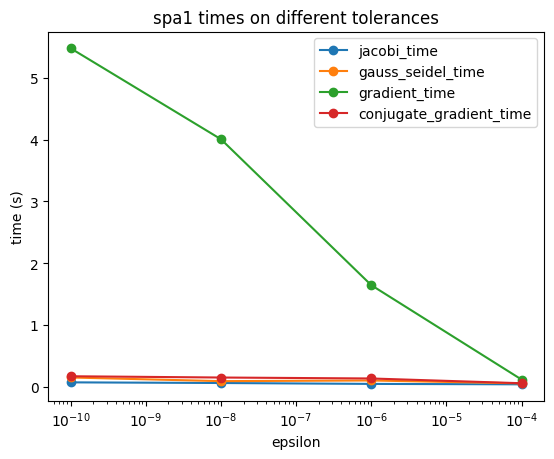

In [64]:
df_spa1[['epsilon', 'jacobi_time', 'gauss_seidel_time', 'gradient_time', 'conjugate_gradient_time']].plot(kind='line', x='epsilon', logx=True, ylabel='time (s)', 
                                                                                                            marker='o', title='spa1 times on different tolerances')

plt.show()

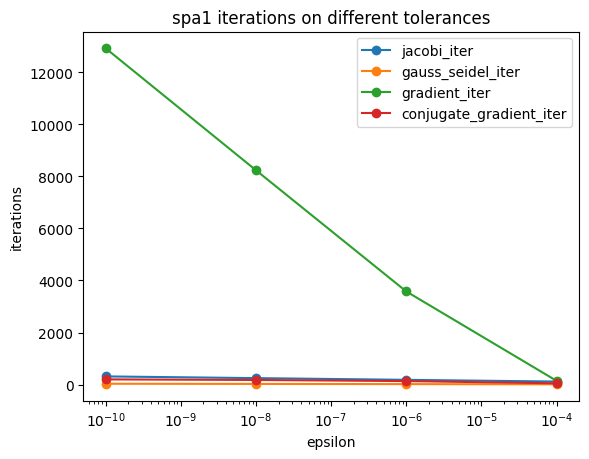

In [65]:
df_spa1[['epsilon', 'jacobi_iter', 'gauss_seidel_iter', 'gradient_iter', 'conjugate_gradient_iter']].plot(kind='line', x='epsilon', logx=True, ylabel='iterations', 
                                                                                                            marker='o', title='spa1 iterations on different tolerances')
plt.show()

### SPA2

In [66]:
df_spa2 = jacobi_epsilon_df[['epsilon', 'spa2_time', 'spa2_iter']]
df_spa2.columns = ['epsilon', 'jacobi_time', 'jacobi_iter']
df_spa2 = df_spa2.merge(gauss_seidel_epsilon_df[['epsilon', 'spa2_time', 'spa2_iter']], on='epsilon')
df_spa2.columns = list(df_spa2.columns)[:-2] + ['gauss_seidel_time', 'gauss_seidel_iter']
df_spa2 = df_spa2.merge(gradient_epsilon_df[['epsilon', 'spa2_time', 'spa2_iter']], on='epsilon')
df_spa2.columns = list(df_spa2.columns)[:-2] + ['gradient_time', 'gradient_iter']
df_spa2 = df_spa2.merge(conjugate_gradient_epsilon_df[['epsilon', 'spa2_time', 'spa2_iter']], on='epsilon')
df_spa2.columns = list(df_spa2.columns)[:-2] + ['conjugate_gradient_time', 'conjugate_gradient_iter']

df_spa2

,epsilon,jacobi_time,jacobi_iter,gauss_seidel_time,gauss_seidel_iter,gradient_time,gradient_iter,conjugate_gradient_time,conjugate_gradient_iter
0,1.000000e-04,0.095518,37,0.297287,6,0.746107,162,0.426621,42
1,1.000000e-06,0.135587,58,0.42053,9,8.838301,1950,1.135591,122
2,1.000000e-08,0.172829,79,0.538953,13,22.060645,5088,1.675488,196
3,1.000000e-10,0.22166,100,0.764551,16,37.205826,8286,2.041009,240


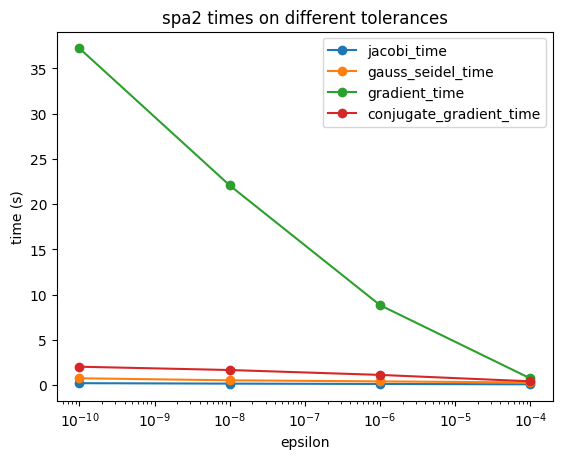

In [67]:
df_spa2[['epsilon', 'jacobi_time', 'gauss_seidel_time', 'gradient_time', 'conjugate_gradient_time']].plot(kind='line', x='epsilon', logx=True, ylabel='time (s)', 
                                                                                                            marker='o', title='spa2 times on different tolerances')

plt.show()

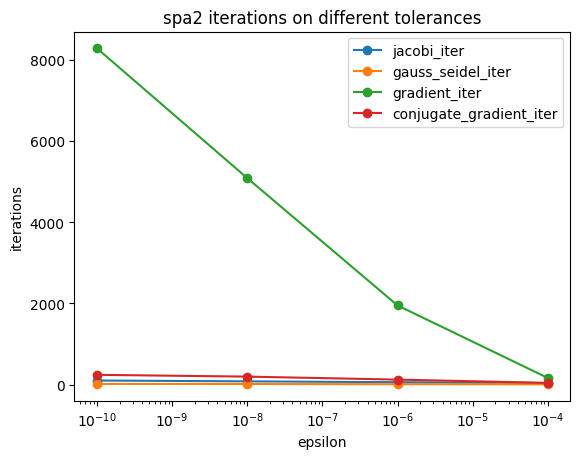

In [68]:
df_spa2[['epsilon', 'jacobi_iter', 'gauss_seidel_iter', 'gradient_iter', 'conjugate_gradient_iter']].plot(kind='line', x='epsilon', logx=True, ylabel='iterations', 
                                                                                                            marker='o', title='spa2 iterations on different tolerances')
plt.show()

### VEM1

In [69]:
df_vem1 = jacobi_epsilon_df[['epsilon', 'vem1_time', 'vem1_iter']]
df_vem1.columns = ['epsilon', 'jacobi_time', 'jacobi_iter']
df_vem1 = df_vem1.merge(gauss_seidel_epsilon_df[['epsilon', 'vem1_time', 'vem1_iter']], on='epsilon')
df_vem1.columns = list(df_vem1.columns)[:-2] + ['gauss_seidel_time', 'gauss_seidel_iter']
df_vem1 = df_vem1.merge(gradient_epsilon_df[['epsilon', 'vem1_time', 'vem1_iter']], on='epsilon')
df_vem1.columns = list(df_vem1.columns)[:-2] + ['gradient_time', 'gradient_iter']
df_vem1 = df_vem1.merge(conjugate_gradient_epsilon_df[['epsilon', 'vem1_time', 'vem1_iter']], on='epsilon')
df_vem1.columns = list(df_vem1.columns)[:-2] + ['conjugate_gradient_time', 'conjugate_gradient_iter']

df_vem1

,epsilon,jacobi_time,jacobi_iter,gauss_seidel_time,gauss_seidel_iter,gradient_time,gradient_iter,conjugate_gradient_time,conjugate_gradient_iter
0,1.000000e-04,0.046126,1315,8.948587,660,0.056809,891,0.00368,38
1,1.000000e-06,0.095134,2434,17.154853,1219,0.094964,1613,0.007391,45
2,1.000000e-08,0.172698,3553,23.076995,1779,0.109381,2337,0.005208,53
3,1.000000e-10,0.190441,4672,30.201626,2339,0.165855,3059,0.005197,59


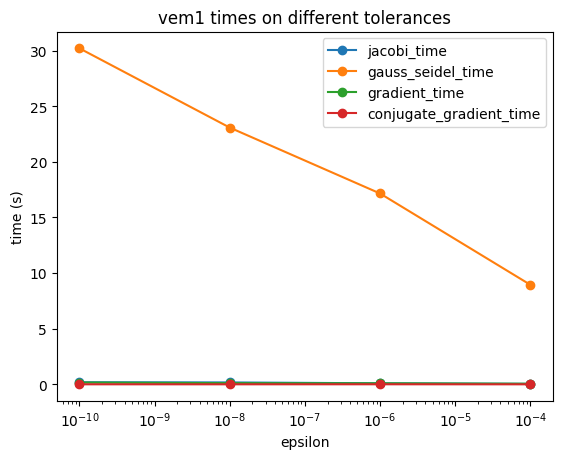

In [70]:
df_vem1[['epsilon', 'jacobi_time', 'gauss_seidel_time', 'gradient_time', 'conjugate_gradient_time']].plot(kind='line', x='epsilon', logx=True, ylabel='time (s)', 
                                                                                                            marker='o', title='vem1 times on different tolerances')

plt.show()

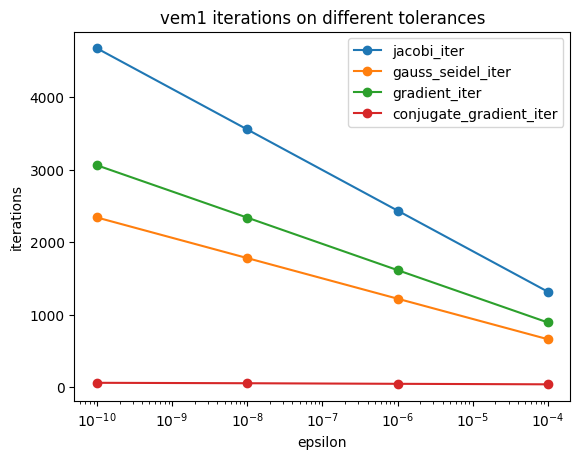

In [71]:
df_vem1[['epsilon', 'jacobi_iter', 'gauss_seidel_iter', 'gradient_iter', 'conjugate_gradient_iter']].plot(kind='line', x='epsilon', logx=True, ylabel='iterations', 
                                                                                                            marker='o', title='vem1 iterations on different tolerances')
plt.show()

### VEM2

In [72]:
df_vem2 = jacobi_epsilon_df[['epsilon', 'vem2_time', 'vem2_iter']]
df_vem2.columns = ['epsilon', 'jacobi_time', 'jacobi_iter']
df_vem2 = df_vem2.merge(gauss_seidel_epsilon_df[['epsilon', 'vem2_time', 'vem2_iter']], on='epsilon')
df_vem2.columns = list(df_vem2.columns)[:-2] + ['gauss_seidel_time', 'gauss_seidel_iter']
df_vem2 = df_vem2.merge(gradient_epsilon_df[['epsilon', 'vem2_time', 'vem2_iter']], on='epsilon')
df_vem2.columns = list(df_vem2.columns)[:-2] + ['gradient_time', 'gradient_iter']
df_vem2 = df_vem2.merge(conjugate_gradient_epsilon_df[['epsilon', 'vem2_time', 'vem2_iter']], on='epsilon')
df_vem2.columns = list(df_vem2.columns)[:-2] + ['conjugate_gradient_time', 'conjugate_gradient_iter']

df_vem2

,epsilon,jacobi_time,jacobi_iter,gauss_seidel_time,gauss_seidel_iter,gradient_time,gradient_iter,conjugate_gradient_time,conjugate_gradient_iter
0,1.000000e-04,0.097447,1928,29.776482,966,0.082941,1309,0.005346,47
1,1.000000e-06,0.183087,3677,58.338193,1841,0.158677,2439,0.007148,56
2,1.000000e-08,0.25356,5426,82.959381,2715,0.22854,3567,0.010405,66
3,1.000000e-10,0.335675,7175,111.108107,3590,0.309319,4697,0.010418,74


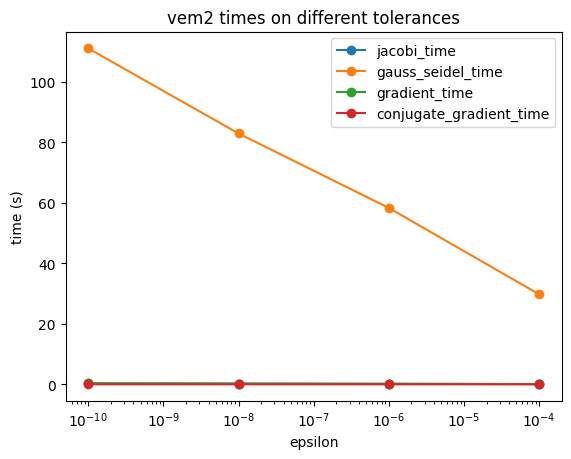

In [73]:
df_vem2[['epsilon', 'jacobi_time', 'gauss_seidel_time', 'gradient_time', 'conjugate_gradient_time']].plot(kind='line', x='epsilon', logx=True, ylabel='time (s)', 
                                                                                                            marker='o', title='vem2 times on different tolerances')

plt.show()

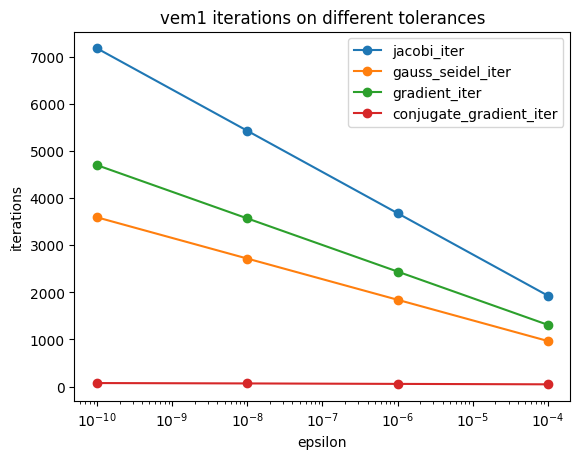

In [74]:
df_vem2[['epsilon', 'jacobi_iter', 'gauss_seidel_iter', 'gradient_iter', 'conjugate_gradient_iter']].plot(kind='line', x='epsilon', logx=True, ylabel='iterations', 
                                                                                                            marker='o', title='vem1 iterations on different tolerances')
plt.show()